<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from time import time
from datetime import datetime
import io
import itertools
from packaging import version
from six.moves import range

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
from google.colab import drive; drive.mount('/content/drive')
import os
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset

TensorFlow version:  2.2.0-rc3
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [0]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))
# Names of the integer classes, i.e., 0 -> T-short/top, 1 -> Trouser, etc.
class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'eight', 'nine', 'ten']
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

# **FAIL1**
The error in this file is solved using Hyperparameter tuning.
A few reasons for the cause of NaN errors is: a) Cross_ entropy or b) large number of connected layers.
The number of connected layers in this example was 8. By tuning the hyperparameter, it was found that the layers above 4 caused an overflow leading to the NaN error.

In [59]:
# define the model first, from input to output

# this is a super deep model, cool!

n_units = 100
n_layers = 8
w_range = 0.4

# just set up a "chain" of hidden layers
layers = []

for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.tanh,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 3.843960762023926 Accuracy: 0.09765625
Loss: 0.7123430967330933 Accuracy: 0.796875
Starting new epoch...
Loss: 0.3953821659088135 Accuracy: 0.8671875
Loss: 0.526154637336731 Accuracy: 0.875
Starting new epoch...
Loss: 0.317238450050354 Accuracy: 0.90625
Loss: 0.22693264484405518 Accuracy: 0.93359375
Starting new epoch...
Loss: 0.21705962717533112 Accuracy: 0.9375
Loss: 0.2842073142528534 Accuracy: 0.91015625
Loss: 0.17896336317062378 Accuracy: 0.94140625
Starting new epoch...
Loss: 0.21249139308929443 Accuracy: 0.9375
Loss: 0.15137720108032227 Accuracy: 0.9609375
Starting new epoch...
Loss: 0.1747284233570099 Accuracy: 0.953125
Loss: 0.11557140946388245 Accuracy: 0.9765625
Starting new epoch...
Loss: 0.10932523757219315 Accuracy: 0.96484375
Loss: 0.11197364330291748 Accuracy: 0.96484375
Loss: 0.17424894869327545 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.09268994629383087 Accuracy: 0.96484375
Loss: 0.07290907204151154 Accuracy: 0.98046875
Starting new epoch...
Loss: 0.083

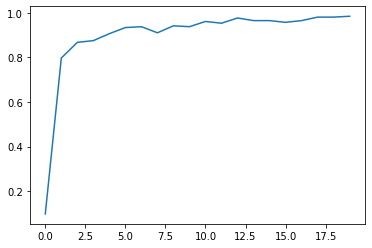

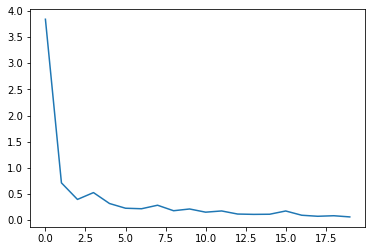

In [60]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail2**
This error was found to be a vanishing gradient problem which is usually solved by ReLU.
The vanishing gradient problem arises due to the nature of the back-propagation optimization which occurs in neural network training . The weight and bias values in the various layers within a neural network are updated each optimization iteration by stepping in the direction of the gradient of the weight/bias values with respect to the loss function. The vanishing gradient problem is particularly problematic with sigmoid activation functions. This can occur when the weights of our networks are initialized poorly – with too-large negative and positive values. These too-large values saturate the input to the sigmoid and pushes the derivatives into the small valued regions.

In [49]:
# define the model first, from input to output


# this is a super deep model, cool!
n_units = 100
n_layers = 4
w_range = 0.1

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense( 
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.3023085594177246 Accuracy: 0.08984375
Loss: 2.214383125305176 Accuracy: 0.3515625
Starting new epoch...
Loss: 1.0367639064788818 Accuracy: 0.609375
Loss: 0.5317537784576416 Accuracy: 0.8515625
Starting new epoch...
Loss: 0.46638113260269165 Accuracy: 0.859375
Loss: 0.37921544909477234 Accuracy: 0.87890625
Starting new epoch...
Loss: 0.32033079862594604 Accuracy: 0.89453125
Loss: 0.18907302618026733 Accuracy: 0.94140625
Loss: 0.2474725842475891 Accuracy: 0.90625
Starting new epoch...
Loss: 0.1587122529745102 Accuracy: 0.9609375
Loss: 0.18086165189743042 Accuracy: 0.953125
Starting new epoch...
Loss: 0.1359712928533554 Accuracy: 0.96875
Loss: 0.11692386865615845 Accuracy: 0.96875
Starting new epoch...
Loss: 0.13512685894966125 Accuracy: 0.9609375
Loss: 0.12769141793251038 Accuracy: 0.95703125
Loss: 0.2476755976676941 Accuracy: 0.94921875
Starting new epoch...
Loss: 0.14334310591220856 Accuracy: 0.9609375
Loss: 0.05920915678143501 Accuracy: 0.9921875
Starting new epoch...
Loss: 0.

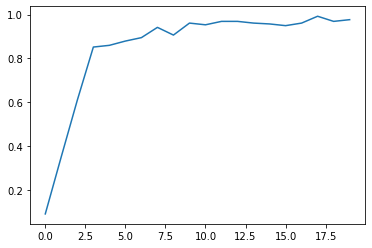

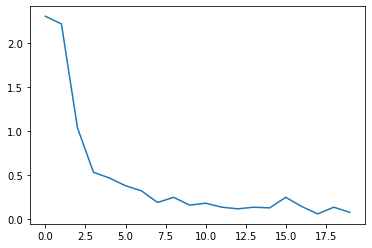

In [50]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail3**

relu---> tanh   
the tanh function is also lesser-used for hidden layers, although some specific models use the tanh function too. Some problems with the output needs of range -1 and 1 use tanh in the output node.

In [0]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.tanh,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

Loss: 2.303022861480713 Accuracy: 0.09765625
Loss: 2.205894947052002 Accuracy: 0.21484375
Loss: 1.8345919847488403 Accuracy: 0.25
Starting new epoch...
Loss: 1.649011492729187 Accuracy: 0.33203125
Loss: 1.5737435817718506 Accuracy: 0.3984375
Starting new epoch...
Loss: 1.3469523191452026 Accuracy: 0.48828125
Loss: 1.4154448509216309 Accuracy: 0.46484375
Starting new epoch...
Loss: 1.048883318901062 Accuracy: 0.64453125
Loss: 0.8720647096633911 Accuracy: 0.65625
Loss: 0.7774233818054199 Accuracy: 0.796875
Starting new epoch...
Loss: 0.5957547426223755 Accuracy: 0.82421875
Loss: 0.526772677898407 Accuracy: 0.84765625
Starting new epoch...
Loss: 0.5288457870483398 Accuracy: 0.828125
Loss: 0.45120301842689514 Accuracy: 0.8671875
Starting new epoch...
Loss: 0.33479177951812744 Accuracy: 0.91015625
Loss: 0.2708434462547302 Accuracy: 0.93359375
Loss: 0.3293144106864929 Accuracy: 0.90234375
Starting new epoch...
Loss: 0.35248756408691406 Accuracy: 0.8984375
Loss: 0.29131799936294556 Accuracy: 

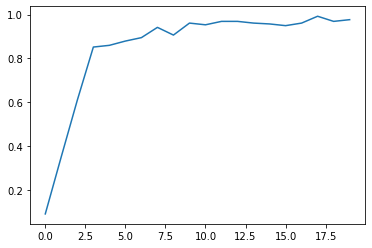

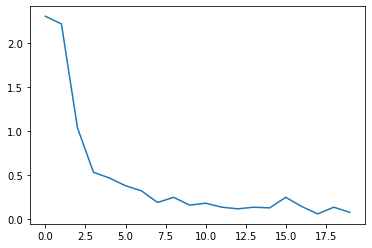

In [51]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail4**
Standard deviation

In [52]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    # I hear adding random noise to inputs helps with generalization!
    img_batch = img_batch + tf.random.normal(tf.shape(img_batch), stddev=0)
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.302572250366211 Accuracy: 0.109375
Loss: 2.3011960983276367 Accuracy: 0.11328125
Loss: 2.298588991165161 Accuracy: 0.1328125
Starting new epoch...
Loss: 2.301609516143799 Accuracy: 0.11328125
Loss: 2.2968451976776123 Accuracy: 0.10546875
Starting new epoch...
Loss: 2.005194664001465 Accuracy: 0.22265625
Loss: 1.3718955516815186 Accuracy: 0.453125
Starting new epoch...
Loss: 0.8484612703323364 Accuracy: 0.6875
Loss: 0.680117666721344 Accuracy: 0.796875
Loss: 0.5217042565345764 Accuracy: 0.82421875
Starting new epoch...
Loss: 0.636810302734375 Accuracy: 0.8203125
Loss: 0.5788102149963379 Accuracy: 0.83984375
Starting new epoch...
Loss: 0.37633955478668213 Accuracy: 0.88671875
Loss: 0.36304616928100586 Accuracy: 0.890625
Loss: 0.40339648723602295 Accuracy: 0.87109375
Starting new epoch...
Loss: 0.28183513879776 Accuracy: 0.8984375
Loss: 0.2965104877948761 Accuracy: 0.90234375
Starting new epoch...
Loss: 0.2850678563117981 Accuracy: 0.91015625
Loss: 0.2527127265930176 Accuracy: 0.9

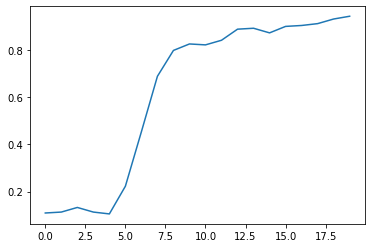

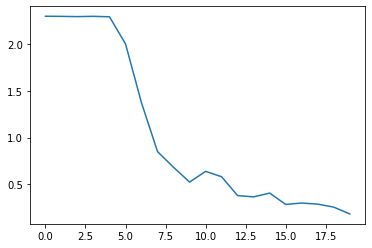

In [53]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail5**

In [54]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the softmax output layer :))
layers.append(tf.keras.layers.Dense(
    10, activation=tf.nn.softmax,
    kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                     maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

Loss: 2.3025832176208496 Accuracy: 0.06640625
Loss: 2.302548885345459 Accuracy: 0.109375
Starting new epoch...
Loss: 2.302450656890869 Accuracy: 0.13671875
Loss: 2.3025012016296387 Accuracy: 0.11328125
Starting new epoch...
Loss: 2.302502393722534 Accuracy: 0.1015625
Loss: 2.3024544715881348 Accuracy: 0.10546875
Starting new epoch...
Loss: 2.302432060241699 Accuracy: 0.140625
Loss: 2.3023900985717773 Accuracy: 0.1171875
Loss: 2.302151679992676 Accuracy: 0.125
Starting new epoch...
Loss: 2.302387237548828 Accuracy: 0.09765625
Loss: 2.3027729988098145 Accuracy: 0.0703125
Starting new epoch...
Loss: 2.302077531814575 Accuracy: 0.109375
Loss: 2.3022263050079346 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.302760601043701 Accuracy: 0.10546875
Loss: 2.3023123741149902 Accuracy: 0.10546875
Loss: 2.30234956741333 Accuracy: 0.12109375
Starting new epoch...
Loss: 2.302276134490967 Accuracy: 0.09765625
Loss: 2.3020997047424316 Accuracy: 0.12109375
Starting new epoch...
Loss: 2.3015093803405

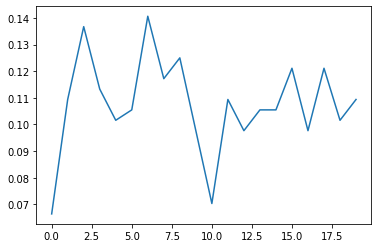

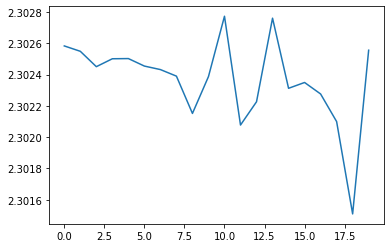

In [55]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)